# Main Sentiment Calculator

In [2]:
# -*- coding: utf-8 -*-
from SentimentCalculator import SentimentCalculator
import db_helper as db
import json
import sys

s = SentimentCalculator()

# postID = int(sys.argv[1])

postID = 335758

listOfCom = db.getAllCommentsForPost(postID)
sent = s.calcSummedSentiment(listOfCom)

db.insertSentForPost(postID, sent)


Connected to DB..
Executin query:  select content from im_commento where idpost = 335758
Closed DB connection..
Ohhhh look it's Gaia!! 💄👠
################################################
emojis found: ['💄', '👠']
text found: Ohhhh look it's Gaia!! 
translated text: Ohhhh look it's Gaia!!
sentiment for text: 0.0
sentiment for emojis: 0.41774891774891776
sentiment combined: 0.41774891774891776
################################################
We love your shoes!! Both of us 😍💄👠
################################################
emojis found: ['😍', '💄', '👠']
text found: We love your shoes!! Both of us 
translated text: We love your shoes!! Both of us
sentiment for text: 0.6988
sentiment for emojis: 0.504478206003603
sentiment combined: 0.6016391030018016
################################################
how cute she is :) adorable xx
################################################
text found: how cute she is :) adorable xx
translated text: how cute she is :) adorable xx
sentiment for text: 0.

C:\Users\Pavle\Miniconda3\envs\thesis\lib\site-packages\pymysql\cursors.py:166: Warning: (1050, "Table 'im_postsentiment' already exists")
  result = self._query(query)


# Main Batch Sentiment Claculator

In [3]:
# -*- coding: utf-8 -*-
from SentimentCalculator import SentimentCalculator
import db_helper as db

conn = db.db_connect()

query = "select distinct idpost from im_commento"
cur = db.doQuery(conn, query)

results = cur.fetchall()

s = SentimentCalculator()

for r in results[:10]:
	listOfCom = db.getAllCommentsForPost(r[0])
	sent = s.calcSummedSentiment(listOfCom)
	db.insertSentForPost(r[0], sent)

Connected to DB..
Executin query:  select distinct idpost from im_commento
Connected to DB..
Executin query:  select content from im_commento where idpost = 79726
Closed DB connection..
Se venite a casa mia ve regalo il GameBoy con la cassetta di Super Mario e fate prima.
################################################
text found: Se venite a casa mia ve regalo il GameBoy con la cassetta di Super Mario e fate prima.
translated text: If you come to my house, give me the GameBoy with the Super Mario box and do it before.
sentiment for text: 0.5994
sentiment for emojis: 0
sentiment combined: 0.5994
################################################
The Barbie collection was the best!
################################################
text found: The Barbie collection was the best!
translated text: The Barbie collection was the best!
sentiment for text: 0.6696
sentiment for emojis: 0
sentiment combined: 0.6696
################################################
I need this tote in my life!!! too

translated text: This is a bomb
sentiment for text: -0.4939
sentiment for emojis: 0
sentiment combined: -0.4939
################################################
#mancoagratise
################################################
text found: #mancoagratise
translated text: #mancoagratise
sentiment for text: 0.0
sentiment for emojis: 0
sentiment combined: 0.0
################################################
#mancoagratise
################################################
text found: #mancoagratise
translated text: #mancoagratise
sentiment for text: 0.0
sentiment for emojis: 0
sentiment combined: 0.0
################################################
Anastasia Nioré c'est pour toi ça !!!
################################################
text found: Anastasia Nioré c'est pour toi ça !!!
translated text: Anastasia Nioré is for you!
sentiment for text: 0.0
sentiment for emojis: 0
sentiment combined: 0.0
################################################
Federica è finita
##############################

C:\Users\Pavle\Miniconda3\envs\thesis\lib\site-packages\pymysql\cursors.py:166: Warning: (1050, "Table 'im_postsentiment' already exists")
  result = self._query(query)


translated text: Well seen last night
What a pity was really a great artist .... but too fragile x endure popularity and media that were always on him ....
sentiment for text: 0.778
sentiment for emojis: 0
sentiment combined: 0.778
################################################
I lik Amy winehouse song she is best 😃😀😊😊
################################################
emojis found: ['😃', '😀', '😊', '😊']
text found: I lik Amy winehouse song she is best 
translated text: I lik Amy winehouse song she is best
sentiment for text: 0.6369
sentiment for emojis: 0.6047970475196099
sentiment combined: 0.6208485237598049
################################################
Visto al cinema e comprato ieri il dvd! ❤
################################################
emojis found: ['❤']
text found: Visto al cinema e comprato ieri il dvd! 
translated text: Seen at the movies and bought the dvd yesterday!
sentiment for text: 0.0
sentiment for emojis: 0.7460869565217392
sentiment combined: 0.7460869565217392

translated text: I could hardly dive so in this way
Virgoline virgoline cccccc
sentiment for text: 0.0
sentiment for emojis: 0
sentiment combined: 0.0
################################################
Ma chi è l'uomo e chi la donna? #aborro
################################################
text found: Ma chi è l'uomo e chi la donna? #aborro
translated text: But who is the man and who the woman? #aborro
sentiment for text: 0.0
sentiment for emojis: 0
sentiment combined: 0.0
################################################
Che fame hanno?
################################################
text found: Che fame hanno?
translated text: What hunger do they have?
sentiment for text: -0.25
sentiment for emojis: 0
sentiment combined: -0.25
################################################
Bruto !!
################################################
text found: Bruto !!
translated text: Stupid !!
sentiment for text: -0.6103
sentiment for emojis: 0
sentiment combined: -0.6103
############################

Executin query:   insert into im_postsentiment (idpost, text_sentiment, emoji_sentiment, combined_sentiment)
				values (79731, 0.1091, 0.13796911684778862, 0.24706911684778862);
Closed DB connection..
Connected to DB..
Executin query:  select content from im_commento where idpost = 79732
Closed DB connection..
Hi, I ordered a bag Saint Laurent Sac De Jour in Oxblood grained leather from you. Received it yesterday but the keys that came along are wrong - black smooth leather! Hope I get the right accessories too still :/
################################################
text found: Hi I ordered a bag Saint Laurent Sac De Jour in Oxblood grained leather from you. Received it yesterday but the keys that came along are wrong - black smooth leather! Hope I get the right accessories too still :/
translated text: Hi I ordered a bag Saint Laurent Sac De Jour in Oxblood grained leather from you. Received it yesterday but the keys that came along are wrong - black smooth leather! Hope I get the 

KeyboardInterrupt: 

# Cluster sentiment analysis

In [3]:
from SentimentCalculator import SentimentCalculator
import db_helper as db
import pandas as pd


df = pd.read_csv("user_social_clustered_new.csv", sep="\t", index_col=0)

clusters = df[' cluster'].unique()
clusters = sorted(clusters)

dct = dict((el, set()) for el in clusters)

# Create {cluster: set of users} hashtable
def groupUserToCluster(dct, row):
    cluster = row[' cluster']
    user_id = row[' user_id']
    dct[cluster].add(user_id)

df.apply(lambda x: groupUserToCluster(dct, x), axis=1)


# Calculate summed sentiment for clusters
cluster_sentiment_dct = dict((el, []) for el in clusters)

s = SentimentCalculator()
conn = db.db_connect()

# Create {cluster: list_of_sentiment_values}
for cluster in clusters:
    for userId in list(dct[cluster]):
        listOfCom = db.getAllCommentsForUser(userId)
        sent = s.calcSummedSentiment(listOfCom)
        cluster_sentiment_dct[cluster].append(sent)

print(cluster_sentiment_dct)
# Calculate cluster sentiments
res = dict((el, 0) for el in clusters)

for key, val in cluster_sentiment_dct.items():
    suma = sum(x['combined'] for x in val)
    res[key] = suma/len(val)

print(res)

Connected to DB..
Connected to DB..
Executin query:  select content from im_commento where from_id = 934234786619394
Closed DB connection..
Music to my ears
################################################
text found: Music to my ears
translated text: Music to my ears
sentiment for text: 0.0
sentiment for emojis: 0
sentiment combined: 0.0
################################################
{'text': 0.0, 'emojis': 0.0, 'combined': 0.0}
Connected to DB..
Executin query:  select content from im_commento where from_id = 639982999436291
Closed DB connection..
. . .Congratulations & Felicitations . . .!!! . . .xoxo . . .what interesting and exciting times we live in . . .the ways of the future . . . Merci Beaucoup  . . .
################################################
text found: . . .Congratulations & Felicitations . . .!!! . . .xoxo . . .what interesting and exciting times we live in . . .the ways of the future . . . Merci Beaucoup  . . .
translated text: . . .Congratulations & Felicitations

translated text: Chanel. impossible to go further!
sentiment for text: 0.0
sentiment for emojis: 0
sentiment combined: 0.0
################################################
{'text': 0.0, 'emojis': 0.0, 'combined': 0.0}
Connected to DB..
Executin query:  select content from im_commento where from_id = 632578743526459
Closed DB connection..
Wonderful
################################################
text found: Wonderful
translated text: Wonderful
sentiment for text: 0.5719
sentiment for emojis: 0
sentiment combined: 0.5719
################################################
{'text': 0.5719, 'emojis': 0.0, 'combined': 0.5719}
Connected to DB..
Executin query:  select content from im_commento where from_id = 110997035729481
Closed DB connection..
Exelente, seguidnos!!!
################################################
text found: Exelente seguidnos!!!
translated text: Exelente follow us !!!
sentiment for text: 0.0
sentiment for emojis: 0
sentiment combined: 0.0
#################################

translated text: Love it!
sentiment for text: 0.6696
sentiment for emojis: 0
sentiment combined: 0.6696
################################################
{'text': 0.6696, 'emojis': 0.0, 'combined': 0.6696}
Connected to DB..
Executin query:  select content from im_commento where from_id = 942859305741406
Closed DB connection..
Like 👌
################################################
emojis found: ['👌']
text found: Like 
translated text: Like
sentiment for text: 0.3612
sentiment for emojis: 0.5637606837606838
sentiment combined: 0.3612
################################################
{'text': 0.3612, 'emojis': 0.5637606837606838, 'combined': 0.3612}
Connected to DB..
Executin query:  select content from im_commento where from_id = 364235473592417
Closed DB connection..
❤️
################################################
emojis found: ['❤']
text found: ️
translated text: ️
sentiment for text: 0.0
sentiment for emojis: 0.7460869565217392
sentiment combined: 0.0
##############################

translated text: 
sentiment for text: 0.0
sentiment for emojis: 0.4728565061722862
sentiment combined: 0.0
################################################
{'text': 0.24635, 'emojis': 0.5528865864194764, 'combined': 0.24635}
Connected to DB..
Executin query:  select content from im_commento where from_id = 89629769393
Closed DB connection..
🎉🎊  A unique Ferrari theme park arrives at PortAventura World! Forza Ferrari Land!
################################################
emojis found: ['🎉', '🎊']
text found:   A unique Ferrari theme park arrives at PortAventura World! Forza Ferrari Land!
translated text: A unique Ferrari theme park arrives at PortAventura World! Forza Ferrari Land!
sentiment for text: 0.0
sentiment for emojis: 0.7334141414141414
sentiment combined: 0.0
################################################
{'text': 0.0, 'emojis': 0.7334141414141414, 'combined': 0.0}
Connected to DB..
Executin query:  select content from im_commento where from_id = 885566734920914
Closed DB con

translated text: #Karl #fantasticKarl
sentiment for text: 0.0
sentiment for emojis: 0
sentiment combined: 0.0
################################################
#CHANEL #fantastic #loveall
################################################
text found: #CHANEL #fantastic #loveall
translated text: #CHANEL #fantastic #loveall
sentiment for text: 0.0
sentiment for emojis: 0
sentiment combined: 0.0
################################################
@CHANEL #amazingcollection
################################################
text found: @CHANEL #amazingcollection
translated text: @CHANEL #amazingcollection
sentiment for text: 0.0
sentiment for emojis: 0
sentiment combined: 0.0
################################################
love
################################################
text found: love
translated text: love
sentiment for text: 0.6369
sentiment for emojis: 0
sentiment combined: 0.6369
################################################
merci CHANEL. Love this video
############################

translated text: Already out of stock!
sentiment for text: 0.0
sentiment for emojis: 0
sentiment combined: 0.0
################################################
Hi Ilona, which item are you interested in? We remind you that promotion for EU and JP isn't valid for Spring/Summer 17 and "starred" items, while for other countries is an extra 20% off sale items. Thank you!
################################################
text found: Hi Ilona which item are you interested in? We remind you that promotion for EU and JP isn't valid for Spring/Summer 17 and "starred" items while for other countries is an extra 20% off sale items. Thank you!
translated text: Hi Ilona which item are you interested in? We remind you that promotion for EU and JP isn't valid for Spring/Summer 17 and "starred" items while for other countries is an extra 20% off sale items. Thank you!
sentiment for text: 0.792
sentiment for emojis: 0
sentiment combined: 0.792
################################################
Hi Anca, un

Executin query:  select content from im_commento where from_id = 361742070552462
Closed DB connection..
<3
################################################
text found: <3
translated text: <3
sentiment for text: 0.4404
sentiment for emojis: 0
sentiment combined: 0.4404
################################################
{'text': 0.4404, 'emojis': 0.0, 'combined': 0.4404}
Connected to DB..
Executin query:  select content from im_commento where from_id = 351493834638
Closed DB connection..
A MUST HAVE 2017 ;-)!
################################################
text found: A MUST HAVE 2017 ;-)!
translated text: A MUST HAVE 2017 ;-)!
sentiment for text: 0.0
sentiment for emojis: 0
sentiment combined: 0.0
################################################
{'text': 0.0, 'emojis': 0.0, 'combined': 0.0}
Connected to DB..
Executin query:  select content from im_commento where from_id = 342496019280784
Closed DB connection..
Very good job!! Premium quality products and good brand attitude.
############

################################################
text found: La Ferrari Aperta125 
375 Monoposto Corsa Indianapolis
166 MM (1949) 
166 MM (1949)
212 Vignale 1952
340 America
750 Monza
365 GT 2+2
275 GTB/2
250 Europa (1954)
250 GT California SWB
365 California Spider
250 GT
250 GT Boano
500 TR
250 GT SWB (1960)
250 GT Tour de France
250 GT California Spider
250 GT California Spider
250 GTE
365 BB
275 GTB
275 GTB
275 GTS
275 GTB rood
250 GTE rood
330 GTS
250 GT Lusso
250 GT California Spider (aluminium 1 of 3)
250 GT Lusso
250 GTE
275 GTB
275 GTB
250 GT
275 GT
250 GT Lusso
250 GT berlinetta smb rood geel om grill
250 GT Tour de France (Japan)
Dino 246 GTS
275 GTS
365 GTB/4 Daytona
330 GTC
330 GTC
Dino 246 GTS
365 GTS/4 Daytona
250 GT
275 GTS
275 GTB
365 GT
365 GTB/4 Daytona
Dino 246 GTB
translated text: La Ferrari Aperta125 
375 Monoposto Corsa Indianapolis
166 MM (1949) 
166 MM (1949)
212 Vignale 1952
340 America
750 Monza
365 GT 2+2
275 GTB/2
250 Europa (1954)
250 GT California SWB
365

translated text: Wonderful - makes me feel so good
sentiment for text: 0.8147
sentiment for emojis: 0.6560170394036209
sentiment combined: 0.8147
################################################
CHANEL and Keira are a perfect match! Love this Campaign - She is a beauty
################################################
text found: CHANEL and Keira are a perfect match! Love this Campaign - She is a beauty
translated text: CHANEL and Keira are a perfect match! Love this Campaign - She is a beauty
sentiment for text: 0.9184
sentiment for emojis: 0
sentiment combined: 0.9184
################################################
Its just Beautiful!
################################################
text found: Its just Beautiful!
translated text: Its just Beautiful!
sentiment for text: 0.636
sentiment for emojis: 0
sentiment combined: 0.636
################################################
to say it in one word: AWESOME !!
################################################
text found: to say it in one 

translated text: Definitely gets us ready for the weekend!
sentiment for text: 0.6696
sentiment for emojis: 0
sentiment combined: 0.6696
################################################
{'text': 0.6696, 'emojis': 0.0, 'combined': 0.6696}
Connected to DB..
Executin query:  select content from im_commento where from_id = 113421785414817
Closed DB connection..
<3
################################################
text found: <3
translated text: <3
sentiment for text: 0.4404
sentiment for emojis: 0
sentiment combined: 0.4404
################################################
<3
################################################
text found: <3
translated text: <3
sentiment for text: 0.4404
sentiment for emojis: 0
sentiment combined: 0.4404
################################################
<3
################################################
text found: <3
translated text: <3
sentiment for text: 0.4404
sentiment for emojis: 0
sentiment combined: 0.4404
###############################################

Executin query:  select content from im_commento where from_id = 391128151032547
Closed DB connection..
Oh they are lovely
################################################
text found: Oh they are lovely
translated text: Oh they are lovely
sentiment for text: 0.5859
sentiment for emojis: 0
sentiment combined: 0.5859
################################################
these look lovely
################################################
text found: these look lovely
translated text: these look lovely
sentiment for text: 0.5859
sentiment for emojis: 0
sentiment combined: 0.5859
################################################
{'text': 0.5859, 'emojis': 0.0, 'combined': 0.5859}
Connected to DB..
Executin query:  select content from im_commento where from_id = 865570073541866
Closed DB connection..
So artistic! Spring is coming !
################################################
text found: So artistic! Spring is coming !
translated text: So artistic! Spring is coming !
sentiment for text: 0.0
sen

translated text: ... stunning!
sentiment for text: 0.4389
sentiment for emojis: 0
sentiment combined: 0.4389
################################################
over the top!
################################################
text found: over the top!
translated text: over the top!
sentiment for text: 0.2714
sentiment for emojis: 0
sentiment combined: 0.2714
################################################
{'text': 0.3829375, 'emojis': 0.0, 'combined': 0.3829375}
Connected to DB..
Executin query:  select content from im_commento where from_id = 556196317807343
Closed DB connection..
Buongiorno, sareste interessati a fare le consegne per il mio negozio, e/o per il mercato dove io lavoro?
################################################
text found: Buongiorno sareste interessati a fare le consegne per il mio negozio e/o per il mercato dove io lavoro?
translated text: Hello, would you be interested in making deliveries for my shop and / or for the market where I work?
sentiment for text: 0.401

translated text: We Love Ferrari!
sentiment for text: 0.6696
sentiment for emojis: 0
sentiment combined: 0.6696
################################################
Love it!
################################################
text found: Love it!
translated text: Love it!
sentiment for text: 0.6696
sentiment for emojis: 0
sentiment combined: 0.6696
################################################
Awesome car!
################################################
text found: Awesome car!
translated text: Awesome car!
sentiment for text: 0.6588
sentiment for emojis: 0
sentiment combined: 0.6588
################################################
It`s Amazing!
################################################
text found: It`s Amazing!
translated text: It`s Amazing!
sentiment for text: 0.6239
sentiment for emojis: 0
sentiment combined: 0.6239
################################################
WWOWW!
################################################
text found: WWOWW!
translated text: WWOWW!
sentiment for tex

translated text: It`s COOL!
sentiment for text: 0.5147
sentiment for emojis: 0
sentiment combined: 0.5147
################################################
Ferrari cars are Awesome!
################################################
text found: Ferrari cars are Awesome!
translated text: Ferrari cars are Awesome!
sentiment for text: 0.6588
sentiment for emojis: 0
sentiment combined: 0.6588
################################################
It`s COOL!
################################################
text found: It`s COOL!
translated text: It`s COOL!
sentiment for text: 0.5147
sentiment for emojis: 0
sentiment combined: 0.5147
################################################
It`s COOL!
################################################
text found: It`s COOL!
translated text: It`s COOL!
sentiment for text: 0.5147
sentiment for emojis: 0
sentiment combined: 0.5147
################################################
It`s nice!
################################################
text found: It`s nice!
tra

translated text: Its Amazing!
sentiment for text: 0.6239
sentiment for emojis: 0
sentiment combined: 0.6239
################################################
Looks Great!
################################################
text found: Looks Great!
translated text: Looks Great!
sentiment for text: 0.6588
sentiment for emojis: 0
sentiment combined: 0.6588
################################################
Awesome car!
################################################
text found: Awesome car!
translated text: Awesome car!
sentiment for text: 0.6588
sentiment for emojis: 0
sentiment combined: 0.6588
################################################
This is cool!
################################################
text found: This is cool!
translated text: This is cool!
sentiment for text: 0.3802
sentiment for emojis: 0
sentiment combined: 0.3802
################################################
Ferrari the BEST!
################################################
text found: Ferrari the BEST!
translated 

translated text: Love it!
sentiment for text: 0.6696
sentiment for emojis: 0
sentiment combined: 0.6696
################################################
Wow!
################################################
text found: Wow!
translated text: Wow!
sentiment for text: 0.6239
sentiment for emojis: 0
sentiment combined: 0.6239
################################################
He is amazing!
################################################
text found: He is amazing!
translated text: He is amazing!
sentiment for text: 0.6239
sentiment for emojis: 0
sentiment combined: 0.6239
################################################
Super CAR!
################################################
text found: Super CAR!
translated text: Super CAR!
sentiment for text: 0.636
sentiment for emojis: 0
sentiment combined: 0.636
################################################
We Love Ferrari!
################################################
text found: We Love Ferrari!
translated text: We Love Ferrari!
sentiment fo

translated text: It's perfect!
sentiment for text: 0.6114
sentiment for emojis: 0
sentiment combined: 0.6114
################################################
Nice car!
################################################
text found: Nice car!
translated text: Nice car!
sentiment for text: 0.4753
sentiment for emojis: 0
sentiment combined: 0.4753
################################################
We Love Ferrari!
################################################
text found: We Love Ferrari!
translated text: We Love Ferrari!
sentiment for text: 0.6696
sentiment for emojis: 0
sentiment combined: 0.6696
################################################
Looks Great!
################################################
text found: Looks Great!
translated text: Looks Great!
sentiment for text: 0.6588
sentiment for emojis: 0
sentiment combined: 0.6588
################################################
We Love Ferrari!
################################################
text found: We Love Ferrari!
translated t

Executin query:  select content from im_commento where from_id = 655962317827911
Closed DB connection..
Se qualcuno volesse passare qualche momento serio e riflettere, provi a dare un'occhiata a questa pagina.
################################################
text found: Se qualcuno volesse passare qualche momento serio e riflettere provi a dare un'occhiata a questa pagina.
translated text: If someone wants to spend a few serious moments and reflect, try to take a look at this page.
sentiment for text: -0.0772
sentiment for emojis: 0
sentiment combined: -0.0772
################################################
Se qualcuno volesse passare qualche momento serio e riflettere, provi a dare un'occhiata a questa pagina.
################################################
text found: Se qualcuno volesse passare qualche momento serio e riflettere provi a dare un'occhiata a questa pagina.
translated text: If someone wants to spend a few serious moments and reflect, try to take a look at this page.
s

Executin query:  select content from im_commento where from_id = 826137784073586
Closed DB connection..
Great post!
################################################
text found: Great post!
translated text: Great post!
sentiment for text: 0.6588
sentiment for emojis: 0
sentiment combined: 0.6588
################################################
Great post!
################################################
text found: Great post!
translated text: Great post!
sentiment for text: 0.6588
sentiment for emojis: 0
sentiment combined: 0.6588
################################################
Great!
################################################
text found: Great!
translated text: Great!
sentiment for text: 0.6588
sentiment for emojis: 0
sentiment combined: 0.6588
################################################
Great!
################################################
text found: Great!
translated text: Great!
sentiment for text: 0.6588
sentiment for emojis: 0
sentiment combined: 0.6588
###########

translated text: beautiful!
sentiment for text: 0.636
sentiment for emojis: 0
sentiment combined: 0.636
################################################
{'text': 0.636, 'emojis': 0.0, 'combined': 0.636}
Connected to DB..
Executin query:  select content from im_commento where from_id = 936903549721537
Closed DB connection..
Great pics!
################################################
text found: Great pics!
translated text: Great pics!
sentiment for text: 0.6588
sentiment for emojis: 0
sentiment combined: 0.6588
################################################
{'text': 0.6588, 'emojis': 0.0, 'combined': 0.6588}
Connected to DB..
Executin query:  select content from im_commento where from_id = 671748456313289
Closed DB connection..
such a beautiful collection by karl (chanel) it reminds me so much of coco and i'm so much in love with the sprong-summer 2017 chanel collection.Thinking of making a post on this one especially he details are stunning okay i'm speechless.....Karl lagerfeld kil

Executin query:  select content from im_commento where from_id = 800107456798854
Closed DB connection..
<3
################################################
text found: <3
translated text: <3
sentiment for text: 0.4404
sentiment for emojis: 0
sentiment combined: 0.4404
################################################
{'text': 0.4404, 'emojis': 0.0, 'combined': 0.4404}
Connected to DB..
Executin query:  select content from im_commento where from_id = 124287247761801
Closed DB connection..
<3
################################################
text found: <3
translated text: <3
sentiment for text: 0.4404
sentiment for emojis: 0
sentiment combined: 0.4404
################################################
<3
################################################
text found: <3
translated text: <3
sentiment for text: 0.4404
sentiment for emojis: 0
sentiment combined: 0.4404
################################################
love <3
################################################
text found: love <3
tra

translated text: I have to share it on my page. My favourite colour. So elegant so bold so stylish. The must have!
sentiment for text: 0.8618
sentiment for emojis: 0
sentiment combined: 0.8618
################################################
{'text': 0.8618, 'emojis': 0.0, 'combined': 0.8618}
Connected to DB..
Executin query:  select content from im_commento where from_id = 605703276192791
Closed DB connection..
LOVE
################################################
text found: LOVE
translated text: LOVE
sentiment for text: 0.6369
sentiment for emojis: 0
sentiment combined: 0.6369
################################################
nice
################################################
text found: nice
translated text: nice
sentiment for text: 0.4215
sentiment for emojis: 0
sentiment combined: 0.4215
################################################
{'text': 0.5292, 'emojis': 0.0, 'combined': 0.5292}
Connected to DB..
Executin query:  select content from im_commento where from_id = 401019349

translated text: You can follow everyone on Instagram! @ianmichaelblack @jgeason @susanfordhair @shirleyhagel @hair_by_olive_flip @jordynshipley
sentiment for text: 0.0
sentiment for emojis: 0
sentiment combined: 0.0
################################################
{'text': 0.4890666666666667, 'emojis': 0.0, 'combined': 0.4890666666666667}
Connected to DB..
Executin query:  select content from im_commento where from_id = 694474257269676
Closed DB connection..
amazing designs 
aalamoki.com/2017/…/ليلي-روز-ديب-تختتم-عرض-أزياء-شانيل-في-با
################################################
text found: amazing designs 
aalamoki.com/2017/…/ليلي-روز-ديب-تختتم-عرض-أزياء-شانيل-في-با
translated text: amazing designs 
aalamoki.com/2017/…/ليلي-روز-ديب-تختتم-عرض-أزياء-شانيل-في-با
sentiment for text: 0.5859
sentiment for emojis: 0
sentiment combined: 0.5859
################################################
{'text': 0.5859, 'emojis': 0.0, 'combined': 0.5859}
Connected to DB..
Executin query:  select con

translated text: Astonishing
sentiment for text: 0.0
sentiment for emojis: 0
sentiment combined: 0.0
################################################
YES!
################################################
text found: YES!
translated text: YES!
sentiment for text: 0.4574
sentiment for emojis: 0
sentiment combined: 0.4574
################################################
That's curious
################################################
text found: That's curious
translated text: That's curious
sentiment for text: 0.3182
sentiment for emojis: 0
sentiment combined: 0.3182
################################################
Aww
################################################
text found: Aww
translated text: Aww
sentiment for text: 0.0
sentiment for emojis: 0
sentiment combined: 0.0
################################################
gosh
################################################
text found: gosh
translated text: gosh
sentiment for text: 0.0
sentiment for emojis: 0
sentiment combined: 0.0
####

translated text: Anything  related to   is really important
sentiment for text: 0.2716
sentiment for emojis: 0
sentiment combined: 0.2716
################################################
I think  anything about  is great who agrees?
################################################
text found: I think  anything about  is great who agrees?
translated text: I think  anything about  is great who agrees?
sentiment for text: 0.7096
sentiment for emojis: 0
sentiment combined: 0.7096
################################################
posts  about  are why  I like   your page
################################################
text found: posts  about  are why  I like   your page
translated text: posts  about  are why  I like   your page
sentiment for text: 0.3612
sentiment for emojis: 0
sentiment combined: 0.3612
################################################
who else really gets  ?
################################################
text found: who else really gets  ?
translated text: who else real

translated text: We are ready
sentiment for text: 0.3612
sentiment for emojis: 0.6403508771929824
sentiment combined: 0.3612
################################################
Nel freezer ci siamo noi 😎🍦
################################################
emojis found: ['😎', '🍦']
text found: Nel freezer ci siamo noi 
translated text: We are in the freezer
sentiment for text: 0.0
sentiment for emojis: 0.48352645539578387
sentiment combined: 0.0
################################################
{'text': 0.0903, 'emojis': 0.5377902853915628, 'combined': 0.0903}
Connected to DB..
Executin query:  select content from im_commento where from_id = 642942629215685
Closed DB connection..
😳 ❤Wow❤😳
################################################
emojis found: ['😳', '❤', '❤', '😳']
text found:  Wow
translated text: Wow
sentiment for text: 0.5859
sentiment for emojis: 0.3819087264878199
sentiment combined: 0.5859
################################################
{'text': 0.5859, 'emojis': 0.381908726487819

translated text: 
sentiment for text: 0.0
sentiment for emojis: 0.8242814483016051
sentiment combined: 0.0
################################################
{'text': 0.0, 'emojis': 0.8242814483016051, 'combined': 0.0}
Connected to DB..
Executin query:  select content from im_commento where from_id = 685412288157277
Closed DB connection..
<3
################################################
text found: <3
translated text: <3
sentiment for text: 0.4404
sentiment for emojis: 0
sentiment combined: 0.4404
################################################
<3
################################################
text found: <3
translated text: <3
sentiment for text: 0.4404
sentiment for emojis: 0
sentiment combined: 0.4404
################################################
Fantastique!
################################################
text found: Fantastique!
translated text: Fantastic!
sentiment for text: 0.5983
sentiment for emojis: 0
sentiment combined: 0.5983
########################################

translated text: We plan to interview by borrowing 488 GTB in the near future. looking forward to!
sentiment for text: 0.0
sentiment for emojis: 0
sentiment combined: 0.0
################################################
{'text': 0.0, 'emojis': 0.0, 'combined': 0.0}
Connected to DB..
Executin query:  select content from im_commento where from_id = 1227154187294694
Closed DB connection..
Love the details~! The craftsmanship is brilliant~! This is art~~~
################################################
text found: Love the details~! The craftsmanship is brilliant~! This is art~~~
translated text: Love the details~! The craftsmanship is brilliant~! This is art~~~
sentiment for text: 0.6988
sentiment for emojis: 0
sentiment combined: 0.6988
################################################
{'text': 0.6988, 'emojis': 0.0, 'combined': 0.6988}
Connected to DB..
Executin query:  select content from im_commento where from_id = 198923923509735
Closed DB connection..
Chanel tiene los mejores perfum

translated text: Absolutely lovee
sentiment for text: 0.0
sentiment for emojis: 0
sentiment combined: 0.0
################################################
{'text': 0.0, 'emojis': 0.0, 'combined': 0.0}
Connected to DB..
Executin query:  select content from im_commento where from_id = 1128802950492797
Closed DB connection..
Superbe!!!!
################################################
text found: Superbe!!!!
translated text: Superb !!!!
sentiment for text: 0.7405
sentiment for emojis: 0
sentiment combined: 0.7405
################################################
{'text': 0.7405, 'emojis': 0.0, 'combined': 0.7405}
Connected to DB..
Executin query:  select content from im_commento where from_id = 105392986487296
Closed DB connection..
"It's about style......"
################################################
text found: "It's about style......"
translated text: "It's about style......"
sentiment for text: 0.0
sentiment for emojis: 0
sentiment combined: 0.0
####################################

translated text: (Y)
sentiment for text: 0.0
sentiment for emojis: 0
sentiment combined: 0.0
################################################
(y)
################################################
text found: (y)
translated text: (Y)
sentiment for text: 0.0
sentiment for emojis: 0
sentiment combined: 0.0
################################################
(y)
################################################
text found: (y)
translated text: (Y)
sentiment for text: 0.0
sentiment for emojis: 0
sentiment combined: 0.0
################################################
(y)
################################################
text found: (y)
translated text: (Y)
sentiment for text: 0.0
sentiment for emojis: 0
sentiment combined: 0.0
################################################
(y)
################################################
text found: (y)
translated text: (Y)
sentiment for text: 0.0
sentiment for emojis: 0
sentiment combined: 0.0
################################################
(y)
##########

Executin query:  select content from im_commento where from_id = 553986411321371
Closed DB connection..
Una combinación perfecta.
################################################
text found: Una combinación perfecta.
translated text: A perfect combination.
sentiment for text: 0.5719
sentiment for emojis: 0
sentiment combined: 0.5719
################################################
{'text': 0.5719, 'emojis': 0.0, 'combined': 0.5719}
Connected to DB..
Executin query:  select content from im_commento where from_id = 1191133810898077
Closed DB connection..
There is one thing that God created, and it is a Tico
################################################
text found: There is one thing that God created and it is a Tico
translated text: There is one thing that God created and it is a Tico
sentiment for text: 0.4767
sentiment for emojis: 0
sentiment combined: 0.4767
################################################
{'text': 0.4767, 'emojis': 0.0, 'combined': 0.4767}
Connected to DB..
Execut

translated text: You can follow everyone on Instagram! @ianmichaelblack @jgeason @susanfordhair @shirleyhagel @hair_by_olive_flip @jordynshipley
sentiment for text: 0.0
sentiment for emojis: 0
sentiment combined: 0.0
################################################
{'text': 0.4890666666666667, 'emojis': 0.0, 'combined': 0.4890666666666667}
Connected to DB..
Executin query:  select content from im_commento where from_id = 203040259718568
Closed DB connection..
<3
################################################
text found: <3
translated text: <3
sentiment for text: 0.4404
sentiment for emojis: 0
sentiment combined: 0.4404
################################################
{'text': 0.4404, 'emojis': 0.0, 'combined': 0.4404}
Connected to DB..
Executin query:  select content from im_commento where from_id = 663344900486068
Closed DB connection..
cool!
################################################
text found: cool!
translated text: cool!
sentiment for text: 0.3802
sentiment for emojis: 0
s

translated text: Great collection:)
sentiment for text: 0.6249
sentiment for emojis: 0
sentiment combined: 0.6249
################################################
<3
################################################
text found: <3
translated text: <3
sentiment for text: 0.4404
sentiment for emojis: 0
sentiment combined: 0.4404
################################################
{'text': 0.5326500000000001, 'emojis': 0.0, 'combined': 0.5326500000000001}
Connected to DB..
Executin query:  select content from im_commento where from_id = 336230746504908
Closed DB connection..
Please visit our facebook page. You can find the handmade leather bag made in Florence https://www.facebook.com/Francesco-Lionetti-336230746504908/?ref=hl
{'text': 0.0, 'emojis': 0.0, 'combined': 0.0}
Connected to DB..
Executin query:  select content from im_commento where from_id = 964217340334286
Closed DB connection..
we are Twins ? ;)  https://www.facebook.com/visioneoltre/  #CULTURECHANEL #visioneoltre #stefanocagol 

Executin query:  select content from im_commento where from_id = 619590514888922
Closed DB connection..
Success seems to be connected with action. Successful people keep moving. They make mistakes, but they don't quit.
################################################
text found: Success seems to be connected with action. Successful people keep moving. They make mistakes but they don't quit.
translated text: Success seems to be connected with action. Successful people keep moving. They make mistakes but they don't quit.
sentiment for text: 0.4588
sentiment for emojis: 0
sentiment combined: 0.4588
################################################
Everything happens for  a reason. So live it, love it, learn from it. Make your smile change the world, but don't let the world change your smile.
################################################
text found: Everything happens for  a reason. So live it love it learn from it. Make your smile change the world but don't let the world change your smi

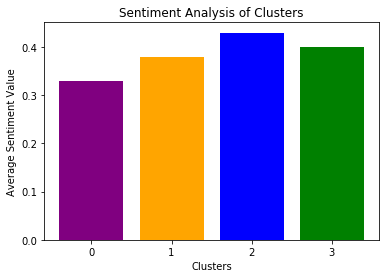

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
dictionary = {0: 0.33, 1: 0.38, 2: 0.43, 3: 0.40}
plt.bar(list(dictionary.keys()), dictionary.values(), color=['purple', 'orange', 'blue', 'green'])
plt.xticks(list(dictionary.keys()))
plt.xlabel('Clusters')
plt.ylabel('Average Sentiment Value')
plt.title('Sentiment Analysis of Clusters')
plt.show()